
# Link_relative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
link=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\Timeseries_lab\\lab5\\link_relative.csv")
link

,year,Q-1,Q-2,Q-3,Q-4
0,2008,65,60,61,63
1,2009,70,58,56,60
2,2010,68,63,68,67
3,2011,65,59,56,62
4,2012,60,55,51,58


In [5]:
# Convert the data frame into numpy one dimentional array
series = link.iloc[:, 1:].astype(float)
series = np.reshape(np.array(series), 20)
series 

array([65., 60., 61., 63., 70., 58., 56., 60., 68., 63., 68., 67., 65.,
       59., 56., 62., 60., 55., 51., 58.])

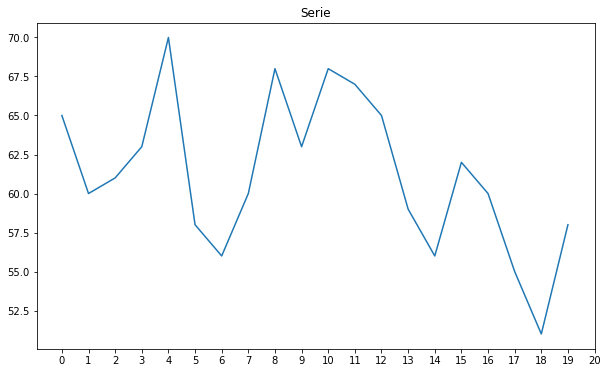

In [7]:
# Plot the serie's data
plt.figure(figsize=(10, 6))
sns.lineplot(data=series)
plt.xticks(range(0, 21))
plt.title('Serie')
plt.show()

In [9]:
s = []
for i in range(len(series)):
    if i == 0:
        s.append(i)
    else:
        s.append((series[i]/series[i-1]) * 100)

In [10]:
new_series = np.reshape(s, (5, 4))
df = link.copy()
df.iloc[:, 1:] = new_series
df

,year,Q-1,Q-2,Q-3,Q-4
0,2008,0.000000,92.307692,101.666667,103.278689
1,2009,111.111111,82.857143,96.551724,107.142857
2,2010,113.333333,92.647059,107.936508,98.529412
3,2011,97.014925,90.769231,94.915254,110.714286
4,2012,96.774194,91.666667,92.727273,113.725490


In [11]:
# Total of Link Relative
total_lr = df.iloc[:, 1:].sum(axis=0)
print('Total of Link Relative\n',total_lr)

Total of Link Relative
 Q-1    418.233563
Q-2    450.247791
Q-3    493.797426
Q-4    533.390733
dtype: float64


In [12]:
# Average of Link Relative
avg_lr = df.iloc[:, 2:].mean(axis=0)
avg_lr['Q-1'] = df.iloc[1:, 1].mean()
avg_lr = avg_lr.sort_index()
print('\nAverage of Link Relative\n',avg_lr)


Average of Link Relative
 Q-1    104.558391
Q-2     90.049558
Q-3     98.759485
Q-4    106.678147
dtype: float64


In [13]:
# Calculate chain relative
cr = []
for i in range(len(avg_lr)):
    if i == 0:
        cr.append(100)
    else:
        cr.append((avg_lr[i] * cr[-1]) / 100)

In [14]:
# Convert into pandas serie
cr = pd.Series(cr, index=avg_lr.index)
print('Chain Relative\n',cr)

Chain Relative
 Q-1    100.000000
Q-2     90.049558
Q-3     88.932480
Q-4     94.871522
dtype: float64


In [15]:
# Calculate the average of the chain relative
avg_cr = cr.mean()
print('\nAverage of chain Relative\n',avg_cr)


Average of chain Relative
 93.46339000302689


In [18]:
# Calculate the correction factor
new_Qt = (avg_lr[0] * cr[3]) / 100 
d = (new_Qt - 100) / 4 
d

-0.20096591380964668

In [19]:
new_Qt

99.19613634476141

In [20]:
# Calculate Adjusted link relative quaterly
Adj_cr = [100]
Adj_cr.append(cr[1] - d)
Adj_cr.append(cr[2] - 2*d)
Adj_cr.append(cr[3] - 3*d)

In [21]:
# Convert into pandas serie
Adj_cr = pd.Series(Adj_cr, index=avg_lr.index)
Adj_cr


Q-1    100.000000
Q-2     90.250524
Q-3     89.334412
Q-4     95.474419
dtype: float64

In [23]:
# Average of Adjusted CR
avg_adj_cr = Adj_cr.mean()
avg_adj_cr

93.76483887374135

In [24]:
# Calculate the Seasonal Indices
index_s = []
for i in Adj_cr:
    index_s.append((i/avg_adj_cr)*100)
# Convert into pandas serie
index_s = pd.Series(index_s, index=avg_lr.index)
index_s      


Q-1    106.649786
Q-2     96.251991
Q-3     95.274959
Q-4    101.823264
dtype: float64

#### Using Ratio-to-Trend method

In [26]:
# Compute the mean of each year
link['x'] = link.iloc[:, 1:].mean(axis=1)
# Sum of x
sum_x = link['x'].sum()
# Define t value (time parameter)
link['t'] = range(-2, 3)
# Sum of t
sum_t = link['t'].sum()
# Compute t square
link['t2'] =link['t']**2
# sum of t square
sum_t_square = link['t2'].sum()
# Compute the product x into t
link['x*t'] =link['x'] * link['t']  
# Compute the sum of x times t
sum_xt = link['x*t'].sum()

In [27]:
link

,year,Q-1,Q-2,Q-3,Q-4,x,t,t2,x*t
0,2008,65,60,61,63,62.25,-2,4,-124.5
1,2009,70,58,56,60,61.00,-1,1,-61.0
2,2010,68,63,68,67,66.50,0,0,0.0
3,2011,65,59,56,62,60.50,1,1,60.5
4,2012,60,55,51,58,56.00,2,4,112.0


In [30]:
# Equation line is : y = b0 + b1 * t
# In this case the sum of t is equal to 0 so the formula is :
b1 = -(link['x'].size * sum_xt)/ ( -(link['x'].size * sum_t_square))
b0 = link['x'].mean() - link['t'].mean() * b1

print(f'Slope : {b1}\nIntercept : {b0}')
print(f'The line equation is y = {b1}*t + {b0}')

Slope : -1.3
Intercept : 61.25
The line equation is y = -1.3*t + 61.25


In [31]:
# Compute the trend using the equation line
link['trend'] = link['t'].apply(lambda t: -1.3*t + 61.25)
link

,year,Q-1,Q-2,Q-3,Q-4,x,t,t2,x*t,trend
0,2008,65,60,61,63,62.25,-2,4,-124.5,63.85
1,2009,70,58,56,60,61.00,-1,1,-61.0,62.55
2,2010,68,63,68,67,66.50,0,0,0.0,61.25
3,2011,65,59,56,62,60.50,1,1,60.5,59.95
4,2012,60,55,51,58,56.00,2,4,112.0,58.65


In [32]:
# Calculate the trend effect for quaters
trend_effect = b1 / 4
print(f'Trend effect for quaters {trend_effect}')

Trend effect for quaters -0.325


In [33]:
new_data = link.copy()
Qt_II = new_data['trend'] - (trend_effect/2)
Qt_III = new_data['trend'] + (trend_effect/2)
new_data['Q-2'] = Qt_II
new_data['Q-3'] = Qt_III
Qt_I = new_data['Q-2'] - trend_effect
Qt_IV = new_data['Q-3'] + trend_effect
new_data['Q-1'] = Qt_I
new_data['Q-4'] = Qt_IV
new_data.drop(['x', 't', 't2', 'x*t', 'trend'], axis=1, inplace=True)

In [34]:
new_data

,year,Q-1,Q-2,Q-3,Q-4
0,2008,64.3375,64.0125,63.6875,63.3625
1,2009,63.0375,62.7125,62.3875,62.0625
2,2010,61.7375,61.4125,61.0875,60.7625
3,2011,60.4375,60.1125,59.7875,59.4625
4,2012,59.1375,58.8125,58.4875,58.1625


In [36]:
# Remove the trend from the data Using ratio method
new_data = pd.concat([link.year, link.iloc[:,1:5] / new_data.iloc[:, 1:] * 100], axis=1)
new_data

,year,Q-1,Q-2,Q-3,Q-4
0,2008,101.029726,93.731693,95.780177,99.427895
1,2009,111.045013,92.485549,89.761571,96.676737
2,2010,110.143754,102.584979,111.315736,110.265377
3,2011,107.549121,98.149303,93.665064,104.267395
4,2012,101.458465,93.517535,87.198119,99.720610


In [37]:
# Seasonal values
List = [new_data.iloc[:,i].mean() for i in range(1, 5)]
sum =  np.sum(List)
print(f'Sum up the yearly average seaonality {sum}')

Sum up the yearly average seaonality 399.954763897814


In [38]:
# Calculate the value of the correction factor k
k = 400 / sum
print('The correction factor k is', k)

The correction factor k is 1.0001131030463173


In [39]:
# Add the seasonal indices for the dataset
seasonal = np.array(List) * k
seasonal

array([106.25723249,  96.10468025,  95.55493956, 102.08314771])

In [40]:
# Convert into pandas serie
seasonal = pd.Series(seasonal, index=avg_lr.index)
seasonal 

Q-1    106.257232
Q-2     96.104680
Q-3     95.554940
Q-4    102.083148
dtype: float64

In [41]:
# Seasonal Index using link relative method
index_s

Q-1    106.649786
Q-2     96.251991
Q-3     95.274959
Q-4    101.823264
dtype: float64

* Interpretation: We can conclude that there is non significant variation using both methods  